# Stability of Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

## Single Linkage Hierarchical Clustering Metric

Let $(X,d_X)$ be a finite metric space. Recall that we defined the *Single Linkage Hierarchical Clustering metric* $u_X$ on $X$ by
$$
u_X(x,x') = \inf\{\epsilon > 0 \mid \mbox{ there exists and $\epsilon$-chain joining $x$ to $x'$}\},
$$
where an $\epsilon$-chain joining $x$ to $x'$ is a sequence 
$$
x = x_1,x_2,\ldots,x_n = x'
$$
such that $d_X(x_i,x_{i+1}) \leq \epsilon$ for all $i = 1,\ldots,n-1$. 

It is easy to see that $u_X$ has the properties:
- $u_X(x,x') \geq 0$ and is equal to 0 if and only if $x = x'$, and
- $u_X(x,x') = u_X(x',x)$
- It takes slightly more work to show that $u_X$ satisfies the *strong triangle inequality*. That is, for all $x,x',x'' \in X$, 
$$
u_X(x,x'') \leq \max \{u_X(x,x'),u_X(x',x'')\}.
$$
This means that $u_X$ defines an *ultrametric* on $X$. 

One can represent $u_X$ using a *dendrogram*, which is the standard way to visualize hierarchical clustering, which we saw examples of last time. Let's look at a couple more examples...

### Example 1

In the lecture notes, we did the following example 'by hand': let $X = \{0,1,3,4,7,8\}$, endowed with Euclidean distance $d_X$. Let's check that the output of the algorithm is the same as what I drew in the notes.

In [2]:
X = np.array([0,1,3,4,7,8]).reshape(6,1) # Datapoints
# Each row should be a point in a Euclidean space, so the matrix should have shape 6x1 in this example.
y = [0,1,3,4,7,8] # Labels for plotting.
print(X)

[[0]
 [1]
 [3]
 [4]
 [7]
 [8]]


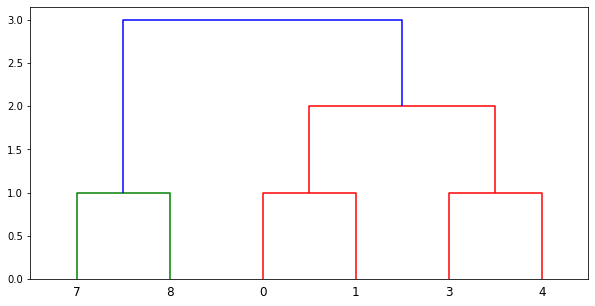

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage  

plt.figure(figsize=(10,5))
linked = linkage(X)
dendrogram(linked, labels = y)
plt.show()

### Example 2

Now let's try a new example. Let $X \subset \mathbb{R}^2$ be the finite metric space $X = \{(0,0),(2,0),(3,0),(0,3),(1,3),(3,3)\}$, endowed with Euclidean distance. 

First, work out the dendrogram of $(X,u_X)$ 'by hand'. (Don't cheat by running the code below!)

**** Break ****

Now we can check our work computationally.

In [4]:
X = np.array([[0,0],[2,0],[3,0],[0,3],[1,3],[3,3]])
print(X)

[[0 0]
 [2 0]
 [3 0]
 [0 3]
 [1 3]
 [3 3]]


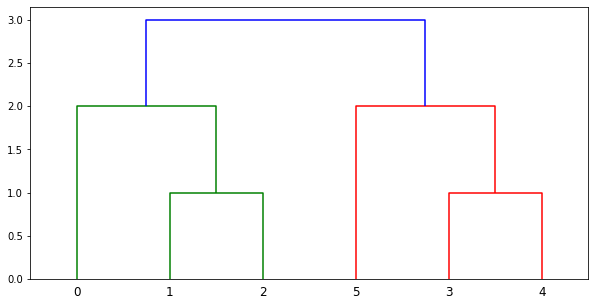

In [5]:
plt.figure(figsize=(10,5))
linked = linkage(X)
dendrogram(linked)
plt.show()

Observe that we have the same merging heights here as in the previous example, but that the dendrogram structures are different, due to the different clustering structures of the datasets. 

**Question:** Fix a set $X$ of $m$ points and consider an ultrametric $u_X$ taking a fixed set of $\leq m-1$ heights. How many possible ultrametrics are there, considered up to isometry? 

### Example 3

The previous two examples used finite metric spaces $(X,d_X)$ obtained as subsets of Euclidean spaces. However, our theory treats *general* finite metric spaces. 

Recall that we can represent a finite metric space by its *distance matrix*. For the previous example, we can construct its distance matrix as follows.

[[0.         2.         3.         3.         3.16227766 4.24264069]
 [2.         0.         1.         3.60555128 3.16227766 3.16227766]
 [3.         1.         0.         4.24264069 3.60555128 3.        ]
 [3.         3.60555128 4.24264069 0.         1.         3.        ]
 [3.16227766 3.16227766 3.60555128 1.         0.         2.        ]
 [4.24264069 3.16227766 3.         3.         2.         0.        ]]


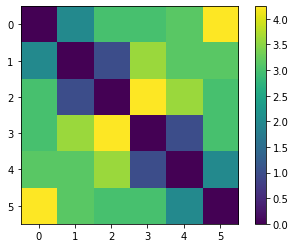

In [7]:
from sklearn.metrics import pairwise_distances

D = pairwise_distances(X)
print(D)

plt.imshow(D)
plt.colorbar()
plt.show()

So any collection of points in some Euclidean space $\mathbb{R}^n$ gives rise to a distance matrix, as above. This distance matrix can be used as input to the hierarchical clustering algorithm, but we need to convert to a 'non-redundant' form to pass into the function.

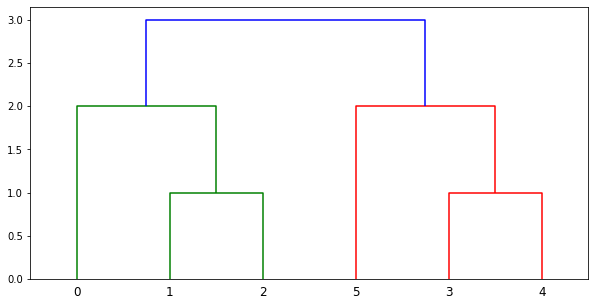

In [8]:
import scipy.spatial.distance as ssd

distArray = ssd.squareform(D) 

plt.figure(figsize=(10,5))
linked = linkage(distArray)
dendrogram(linked)
plt.show()

On the other hand, a general distance matrix does not need to arise from a collection of points in $\mathbb{R}^n$. Consider the matrix defined below.

In [9]:
D = np.array([[0, 1, 2, 3],
              [1, 0, 3, 4],
              [2, 3, 0, 5],
              [3, 4, 5, 0]])

print(D)

[[0 1 2 3]
 [1 0 3 4]
 [2 3 0 5]
 [3 4 5 0]]


**Question:** How can we tell that `D` is really a distance matrix?

In [10]:
D - D.T

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

This distance matrix is *non-Euclidean*; i.e., there is no way to embed four points into $\mathbb{R}^n$ (for any $n$) such that the distance matrix of the result is equal to `D`.

**Exercise:** See if you can *prove* that this matrix is non-Euclidean. In general, this is a difficult task, but it's not so hard to see for this simple example!

We can still pass this non-Euclidean distance matrix into the hierarchical clustering algorithm.

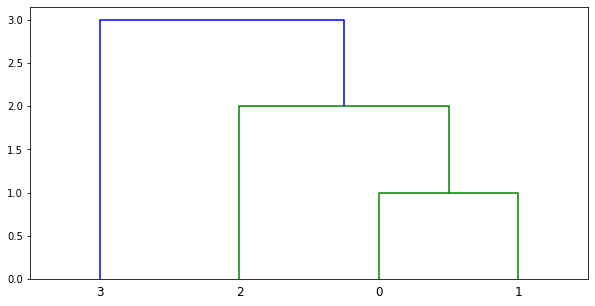

In [11]:
distArray = ssd.squareform(D) 

plt.figure(figsize=(10,5))
linked = linkage(distArray)
dendrogram(linked)
plt.show()

The distance matrix `D` can be realized as the distance matrix of a graph. I'll create and render the graph using the `networkx` package, imported at the beginning as `nx`.

/Users/needham/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


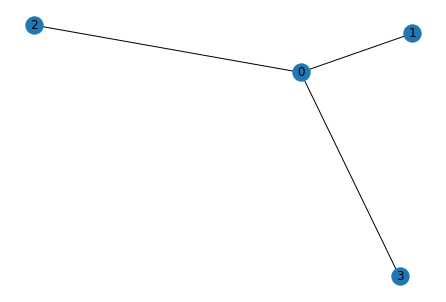

In [12]:
G = nx.Graph() # Initializing the graph

# Add weighted edges
G.add_edge(0,1,weight = 1) 
G.add_edge(0,2,weight = 2)
G.add_edge(0,3,weight = 3)

# Draw the graph using the Kamada-Kawai graph layout algorithm
nx.draw_kamada_kawai(G, with_labels = True)

To be precise, this is actually a *weighted graph*, where the edges have weights (or lengths) 1, 2 and 3, respectively. The metric takes the lengths of edges into account when measuring the lengths of paths between vertices.

**Exercise:** Write down a precise definition of the geodesic metric for a weighted graph.

**Exercise:** Check that the distance matrix `D` defined above is the distance matrix for this graph.

**Exercise:** Play around with this code to figure out how to define your own weighted graphs. Once you create a weighted graph, you can compute its distance matrix using the function `nx.floyd_warshall_numpy`, and you can then look at the dendrogram for your graph. This is a good way to build intuition about non-Euclidean metrics and clustering!

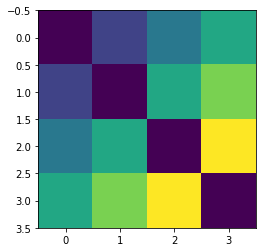

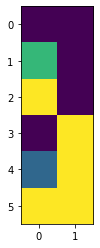

In [20]:
D = nx.floyd_warshall_numpy(G)
plt.imshow(D)
plt.show()

plt.imshow(X)
plt.show()

## Gromov-Hausdorff Stability

At a high level, we can think of the Single Linkage Hierarchical Clustering (SLHC) algorithm as defining a map
\begin{align*}
\mathrm{SLHC}:\{\mbox{finite metric spaces}\} &\to \{\mbox{finite ultrametric spaces}\}\\
(X,d_X) &\mapsto (X,u_X),
\end{align*}
where $u_X$ is the SLCH metric defined above.

Intuitively, this map takes metric spaces which are 'similar' and produces ultrametric spaces which are also 'similar'. This can be made precise as follows.

In lecture, we defined a way to compare finite metric spaces called *Gromov-Hausdorff distance*, denoted $d_\mathrm{GH}$. In fact, we proved that Gromov-Hausdorff distance defines a metric on the space of isometry classes of compact metric spaces! We then have the following theorem, due to Carlsson and Mémoli.

**Theorem.** Let $(X,d_X)$ and $(Y,d_Y)$ be finite metric spaces. Then
$$
d_\mathrm{GH}((X,u_X),(Y,u_Y)) \leq d_\mathrm{GH}((X,d_X),(Y,d_Y)).
$$

This theorem has a quick corollary which will be useful on your homework.

**Corollary.** Let $(X,d_X)$ be a finite metric space and let $I = [0,1]$ be the unit interval, endowed with Euclidean distance $d_I$. Then 
$$
\sup_{x,x' \in X} u_X(x,x') \leq d_\mathrm{GH}((X,d_X),(I,d_I)).
$$

Let's break from the notebook to prove these results.

**** Break ****